# KYPHOSIS Disease Detection

In [1]:
#importing all the neccesary libraries...
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/hp/Downloads/dataset/kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


# exploring data

In [32]:
print(" rows and columns are:")
print(df.shape)
print()
print("head is")
print(df.head())
print()
print("tail is")
print(df.tail())
print()
print("random rows are")
print(df.sample(5))
print()
print(" dataset info are")
print(df.info)
print()
print(" arthematic operations are")
print(df.describe())

 rows and columns are:
(81, 4)

head is
  Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

tail is
   Kyphosis  Age  Number  Start
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

random rows are
   Kyphosis  Age  Number  Start
5    absent    1       2     16
41   absent   35       3     13
45  present  139       3     10
9   present   59       6     12
51   absent    9       2     17

 dataset info are
<bound method DataFrame.info of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
5    absent    1       2     16
6    absent   61       2     17
7    absent   37       3     16
8    absent  113       2 

In [54]:
df.sort_values("Age",ascending=True).head().inplace=True

In [55]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


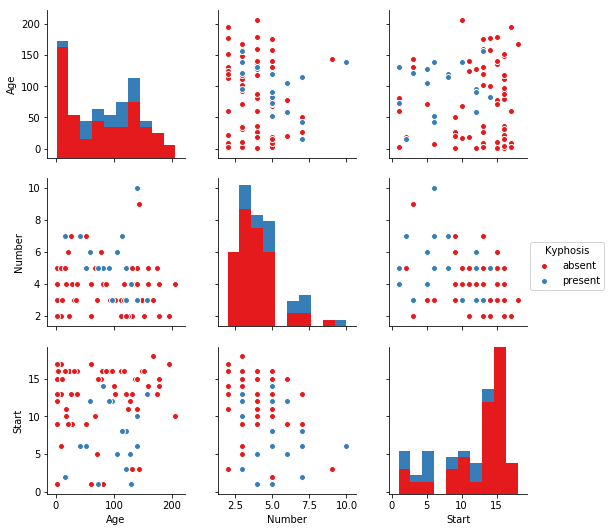

In [15]:
sns.pairplot(df,hue="Kyphosis",palette="Set1")

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


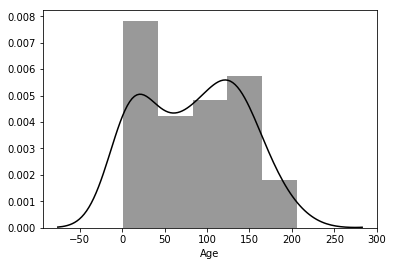

In [5]:
sns.distplot(df["Age"],color="k")

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


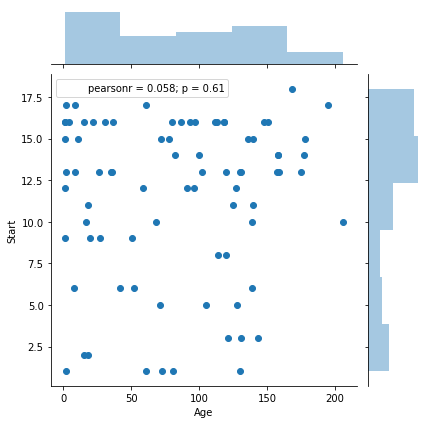

In [25]:
sns.jointplot(x="Age",y="Start",data=df,kind="scatter")

# Train Test Split

# split data set into training set and test set

In [4]:
from sklearn.model_selection import train_test_split
x=df.drop("Kyphosis",axis=1)
y=df["Kyphosis"]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30)
x_train.head()

,Age,Number,Start
34,140,5,11
23,131,2,3
17,175,5,13
55,72,5,15
11,148,3,16


In [9]:
X_test.head()

,Age,Number,Start
69,15,5,16
79,42,7,6
13,1,4,12
75,178,4,15
9,59,6,12


In [11]:
y_train.head()

7     absent
38    absent
72    absent
47    absent
51    absent
Name: Kyphosis, dtype: object

In [13]:
y_test.head()

69     absent
79    present
13     absent
75     absent
9     present
Name: Kyphosis, dtype: object

# decesion tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# prediction and evaluation

In [7]:
prediction=dtree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(prediction,y_test))
print(confusion_matrix(prediction,y_test))

             precision    recall  f1-score   support

     absent       0.89      0.76      0.82        21
    present       0.29      0.50      0.36         4

avg / total       0.79      0.72      0.75        25

[[16  5]
 [ 2  2]]


In [10]:
#accuracy is:
  
18/25

0.72

# random forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=600)
rfc.fit(x_train,y_train)
prediction=rfc.predict(x_test)


from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(prediction,y_test))
print(confusion_matrix(prediction,y_test))

             precision    recall  f1-score   support

     absent       0.94      0.74      0.83        23
    present       0.14      0.50      0.22         2

avg / total       0.88      0.72      0.78        25

[[17  6]
 [ 1  1]]


In [13]:
#accuracy is:
18/25

0.72

in both decision tree and in random forest accuracy is exactly same that is 72%